<a href="https://colab.research.google.com/github/Thomascc123/Proyecto-Kaggle-Modelos/blob/master/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaciones

In [95]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import unicodedata

# Carga Del Archivo

In [96]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


## Descomprimiendo

In [97]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [98]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
example = pd.read_csv('submission_example.csv')

In [99]:
train.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


#Limpeza de las columnas

In [100]:
train.isnull().sum()

,0
ID,0
PERIODO_ACADEMICO,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773


In [101]:
train.isnull().mean()*100

,0
ID,0.000000
PERIODO_ACADEMICO,0.000000
E_PRGM_ACADEMICO,0.000000
E_PRGM_DEPARTAMENTO,0.000000
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENEINTERNET,3.845343
F_EDUCACIONPADRE,3.347004
F_TIENELAVADORA,5.743394


In [102]:
traincopy = train.copy()

In [103]:
def viewValues(df, column):
  print(df[column].fillna("null", inplace=False).value_counts())
  df[column].fillna("null", inplace=False).value_counts().plot(kind='bar')

In [104]:
def fillDefault(df, column, value):
  df[column].fillna(value, inplace=True)

In [105]:
def compareDiscreteValues(df, column):
  #fig, axes = plt.subplots(1, 2, figsize=(16, 5))

  comparision = pd.crosstab(df[column].fillna("null", inplace=False), df['RENDIMIENTO_GLOBAL'])
  sns.heatmap(comparision)#, ax=axes[0])

  #sns.stripplot(x=column, y='RENDIMIENTO_GLOBAL', data=df, jitter=True, ax=axes[1])

In [106]:
def replaceNullByList(df, column, list):
  numNulls = df[column].isna().sum()
  ramdomReplaces = np.random.choice(list, size=numNulls, replace=True)
  df[column].loc[df[column].isna()] = ramdomReplaces

In [107]:
def getDistincValues(df, column):
  return df[column][~df[column].isna()].unique().tolist()

### E_VALORMATRICULAUNIVERSIDAD

E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
null                                          6287
Name: count, dtype: int64


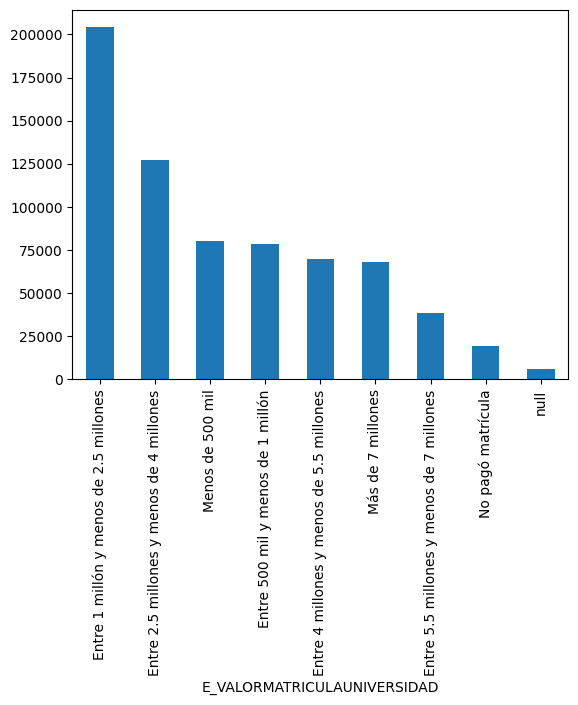

In [108]:
viewValues(train, "E_VALORMATRICULAUNIVERSIDAD")

In [109]:
fillDefault(traincopy, 'E_VALORMATRICULAUNIVERSIDAD', "No pagó matrícula")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            25815
Name: count, dtype: int64


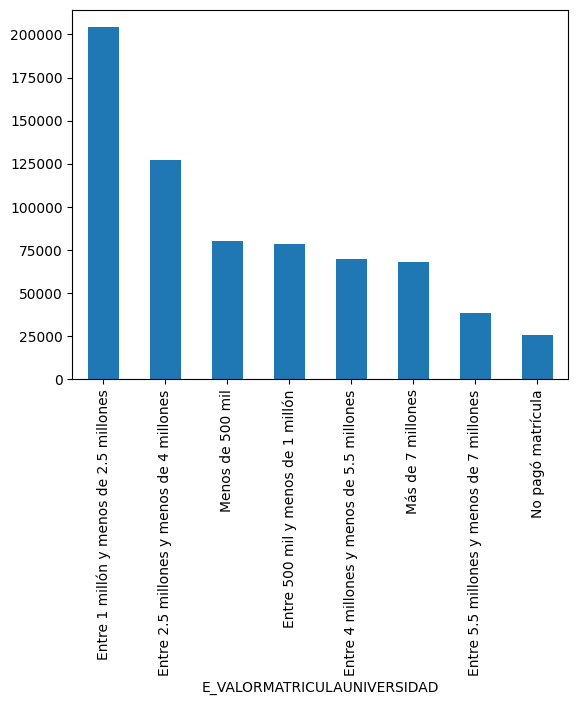

In [110]:
viewValues(traincopy, 'E_VALORMATRICULAUNIVERSIDAD')

### E_HORASSEMANATRABAJA

E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
null                    30857
Name: count, dtype: int64


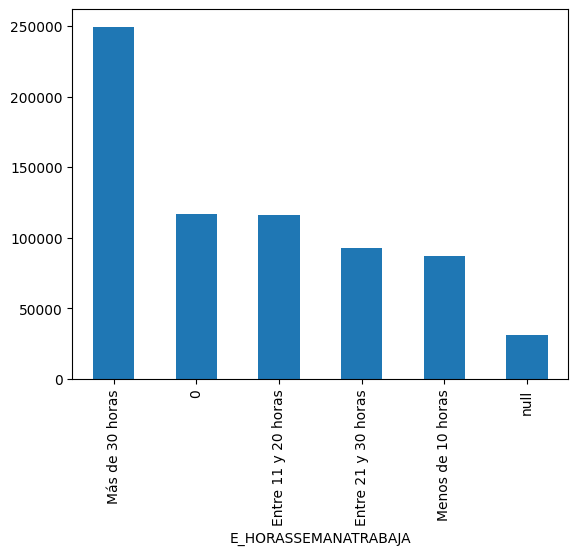

In [111]:
viewValues(train, 'E_HORASSEMANATRABAJA')

In [112]:
fillDefault(traincopy, 'E_HORASSEMANATRABAJA', "0")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      147407
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


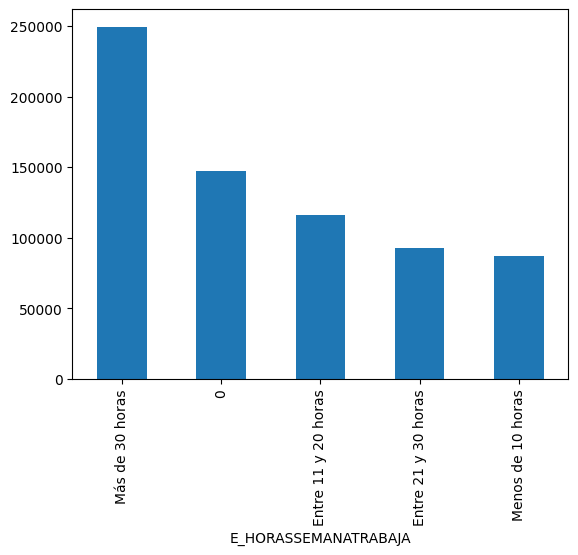

In [113]:
viewValues(traincopy, 'E_HORASSEMANATRABAJA')

## F_ESTRATOVIVIENDA

F_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
null            32137
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64


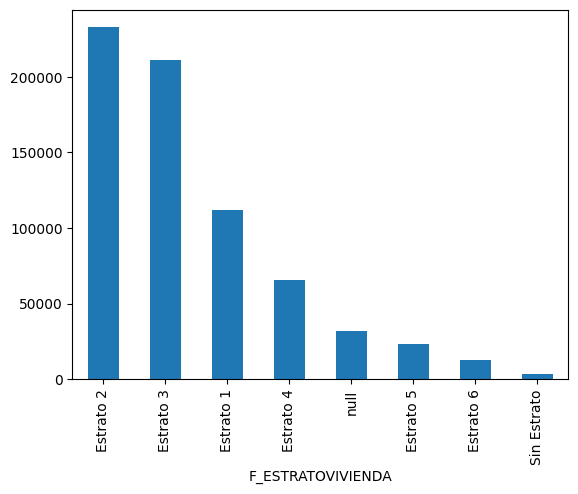

In [114]:
viewValues(train, 'F_ESTRATOVIVIENDA')

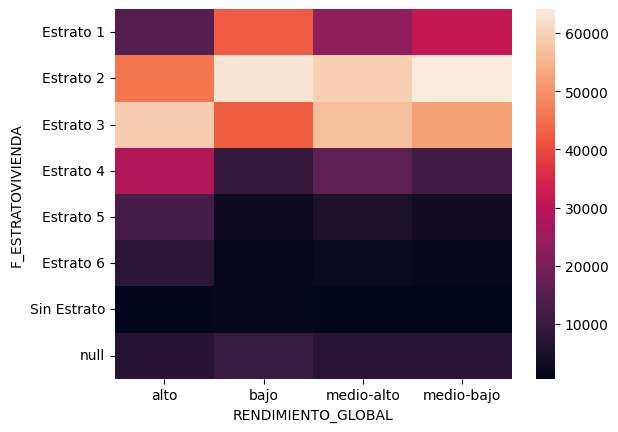

In [115]:
compareDiscreteValues(train, 'F_ESTRATOVIVIENDA')

In [116]:
columnValues = getDistincValues(traincopy, 'F_ESTRATOVIVIENDA')
print(columnValues)
replaceNullByList(traincopy, 'F_ESTRATOVIVIENDA', columnValues)

['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1', 'Estrato 6', 'Sin Estrato']


/tmp/ipython-input-3805581052.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isna()] = ramdomReplaces
/tmp/ipython-input-3805581052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

F_ESTRATOVIVIENDA
Estrato 2      237282
Estrato 3      215199
Estrato 1      116621
Estrato 4       70192
Estrato 5       28168
Estrato 6       17225
Sin Estrato      7813
Name: count, dtype: int64


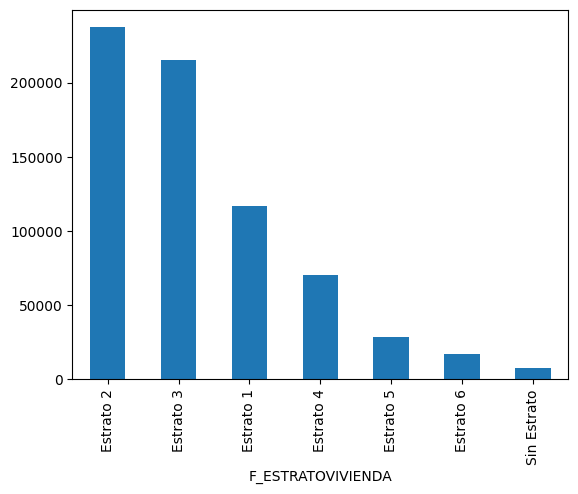

In [117]:
viewValues(traincopy, 'F_ESTRATOVIVIENDA')

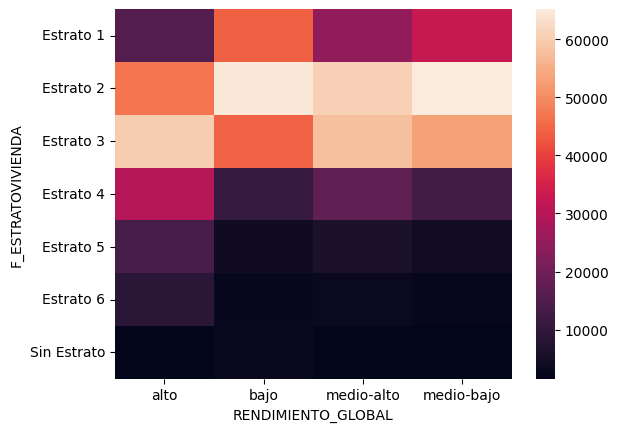

In [118]:
compareDiscreteValues(traincopy, 'F_ESTRATOVIVIENDA')

## F_TIENEINTERNET

F_TIENEINTERNET
Si      592514
No       73357
null     26629
Name: count, dtype: int64


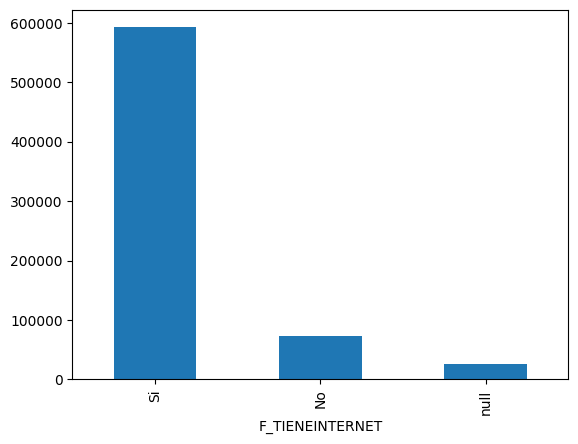

In [119]:
viewValues(train, 'F_TIENEINTERNET')

In [120]:
fillDefault(traincopy, 'F_TIENEINTERNET', "No")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


F_TIENEINTERNET
Si    592514
No     99986
Name: count, dtype: int64


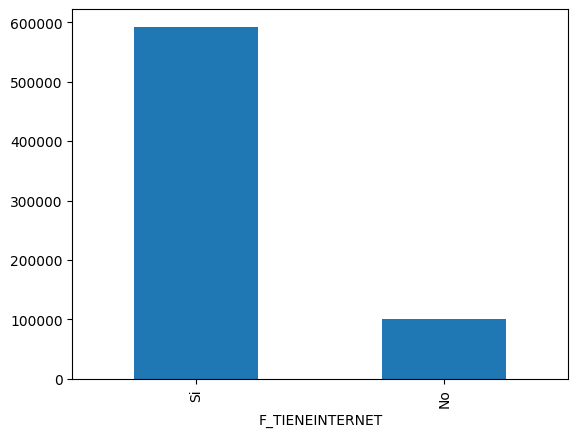

In [121]:
viewValues(traincopy, 'F_TIENEINTERNET')

## F_EDUCACIONPADRE

F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
null                                     23178
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64


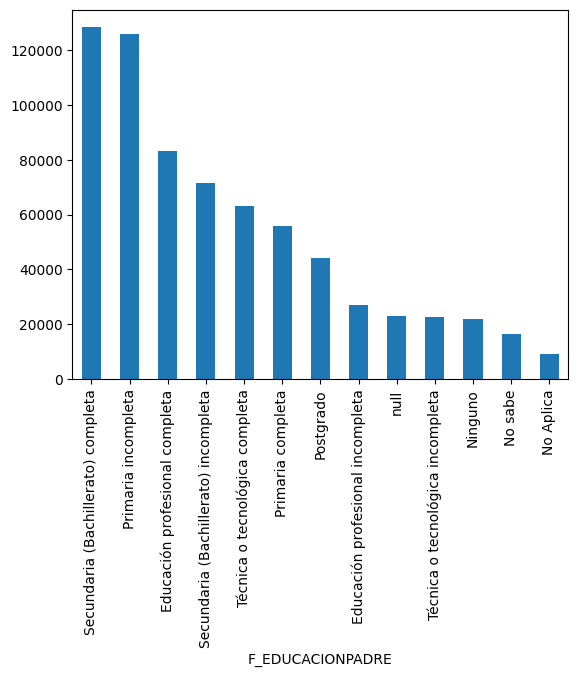

In [122]:
viewValues(train, 'F_EDUCACIONPADRE')

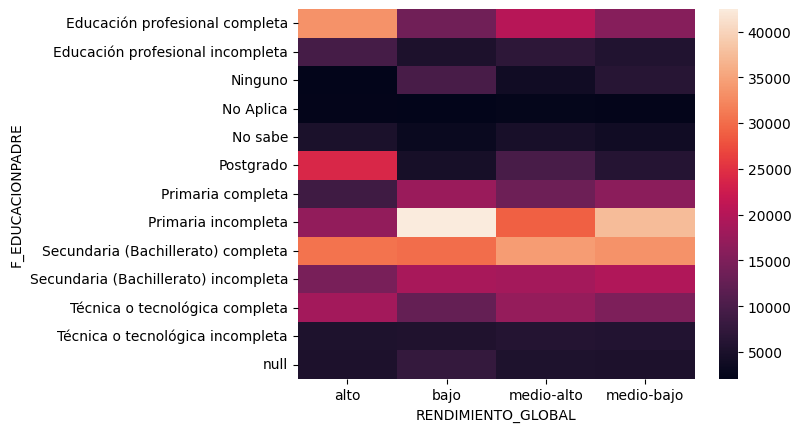

In [123]:
compareDiscreteValues(train, 'F_EDUCACIONPADRE')

In [124]:
columnValues = getDistincValues(traincopy, 'F_EDUCACIONPADRE')
print(columnValues)
replaceNullByList(traincopy, 'F_EDUCACIONPADRE', columnValues)

['Técnica o tecnológica incompleta', 'Técnica o tecnológica completa', 'Secundaria (Bachillerato) completa', 'No sabe', 'Primaria completa', 'Educación profesional completa', 'Educación profesional incompleta', 'Primaria incompleta', 'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno', 'No Aplica']


/tmp/ipython-input-3805581052.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isna()] = ramdomReplaces
/tmp/ipython-input-3805581052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      130237
Primaria incompleta                     127572
Educación profesional completa           85084
Secundaria (Bachillerato) incompleta     73643
Técnica o tecnológica completa           64970
Primaria completa                        57785
Postgrado                                46141
Educación profesional incompleta         29002
Técnica o tecnológica incompleta         24499
Ninguno                                  23871
No sabe                                  18496
No Aplica                                11200
Name: count, dtype: int64


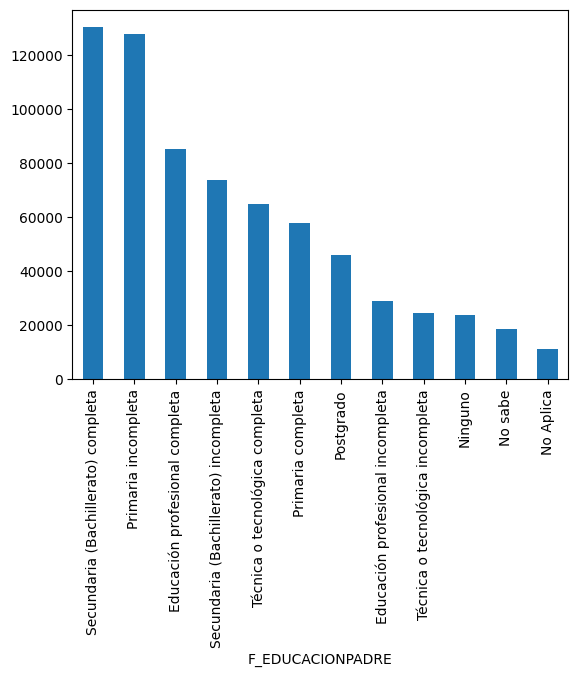

In [125]:
viewValues(traincopy, 'F_EDUCACIONPADRE')

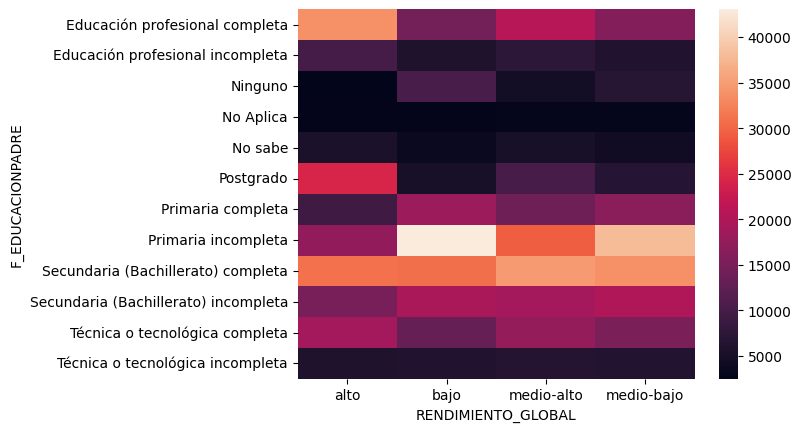

In [126]:
compareDiscreteValues(traincopy, 'F_EDUCACIONPADRE')

## F_TIENELAVADORA

F_TIENELAVADORA
Si      563390
No       89337
null     39773
Name: count, dtype: int64


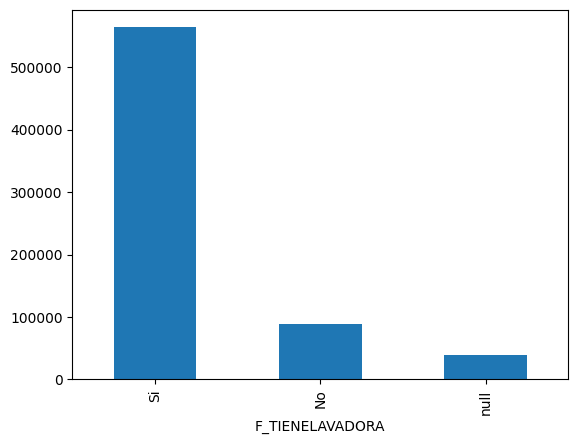

In [127]:
viewValues(train, 'F_TIENELAVADORA')

In [128]:
fillDefault(traincopy, 'F_TIENELAVADORA', "No")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


F_TIENELAVADORA
Si    563390
No    129110
Name: count, dtype: int64


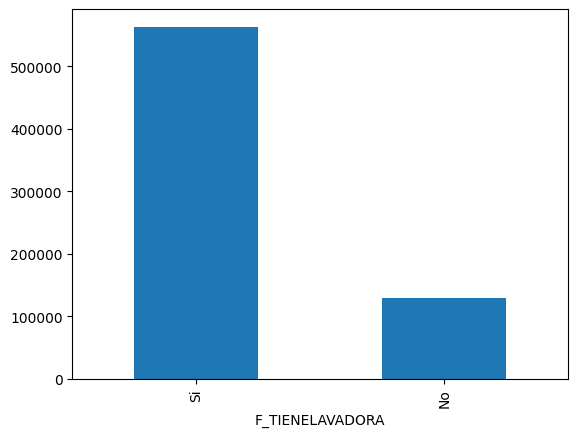

In [129]:
viewValues(traincopy, 'F_TIENELAVADORA')

## F_TIENEAUTOMOVIL

F_TIENEAUTOMOVIL
No      412606
Si      236271
null     43623
Name: count, dtype: int64


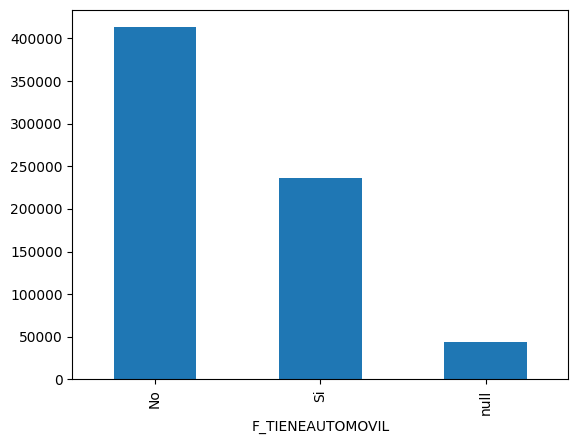

In [130]:
viewValues(train, 'F_TIENEAUTOMOVIL')

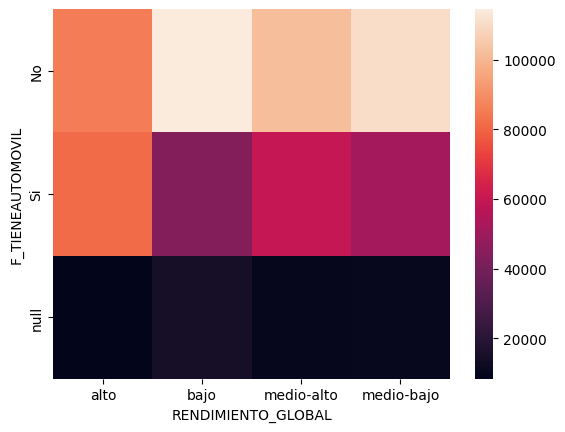

In [131]:
compareDiscreteValues(train, 'F_TIENEAUTOMOVIL')

In [132]:
columnValues = getDistincValues(traincopy, 'F_TIENEAUTOMOVIL')
print(columnValues)
replaceNullByList(traincopy, 'F_TIENEAUTOMOVIL', columnValues)

['Si', 'No']


/tmp/ipython-input-3805581052.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isna()] = ramdomReplaces
/tmp/ipython-input-3805581052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

F_TIENEAUTOMOVIL
No    434373
Si    258127
Name: count, dtype: int64


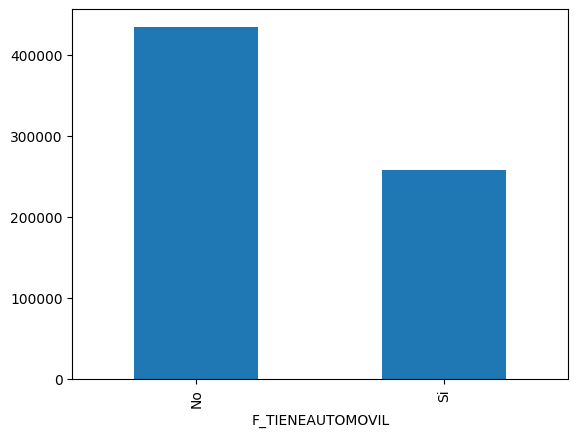

In [133]:
viewValues(traincopy, 'F_TIENEAUTOMOVIL')

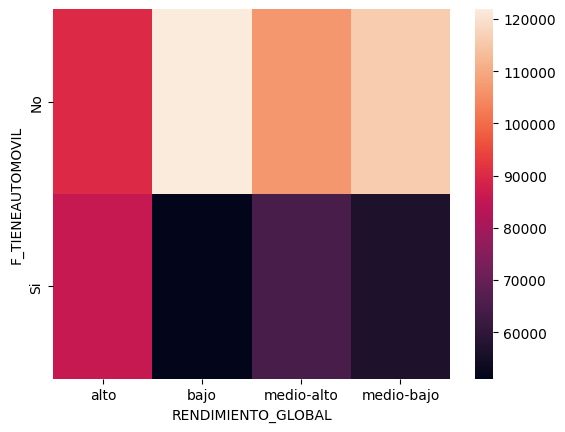

In [134]:
compareDiscreteValues(traincopy, 'F_TIENEAUTOMOVIL')

## E_PAGOMATRICULAPROPIO

E_PAGOMATRICULAPROPIO
No      382201
Si      303801
null      6498
Name: count, dtype: int64


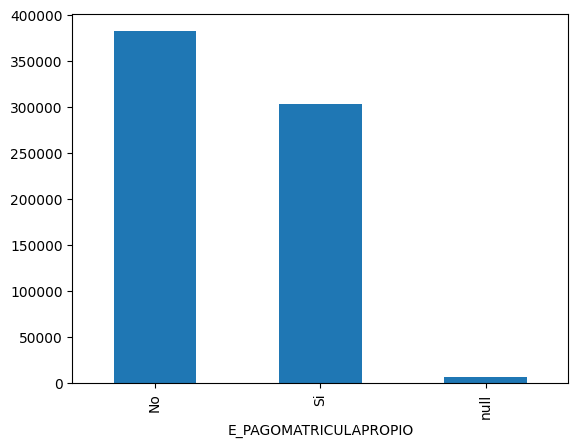

In [135]:
viewValues(train, 'E_PAGOMATRICULAPROPIO')

In [136]:
fillDefault(traincopy, 'E_PAGOMATRICULAPROPIO', "No")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


E_PAGOMATRICULAPROPIO
No    388699
Si    303801
Name: count, dtype: int64


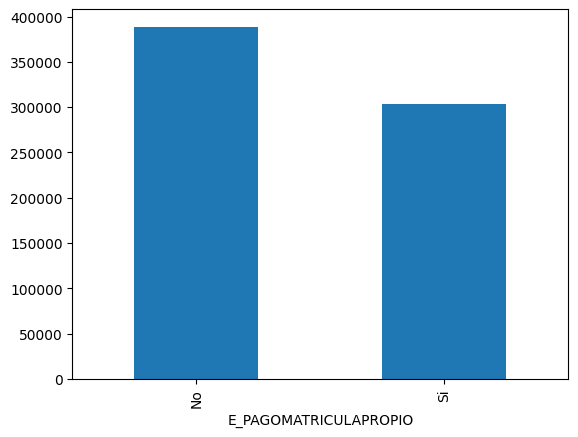

In [137]:
viewValues(traincopy, 'E_PAGOMATRICULAPROPIO')

## F_TIENECOMPUTADOR

F_TIENECOMPUTADOR
Si      597670
No       56727
null     38103
Name: count, dtype: int64


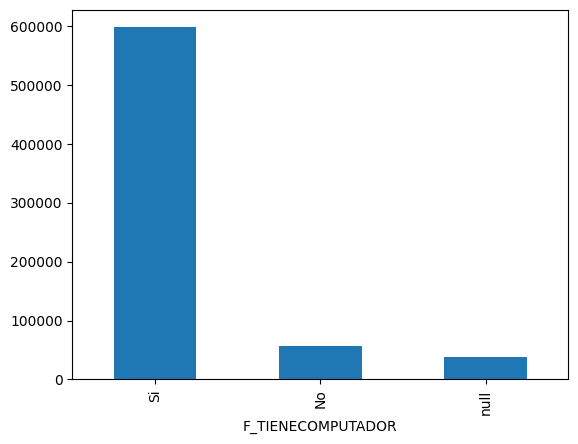

In [138]:
viewValues(train, 'F_TIENECOMPUTADOR')

In [139]:
fillDefault(traincopy, 'F_TIENECOMPUTADOR', "No")

/tmp/ipython-input-3025131101.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True)


F_TIENECOMPUTADOR
Si    597670
No     94830
Name: count, dtype: int64


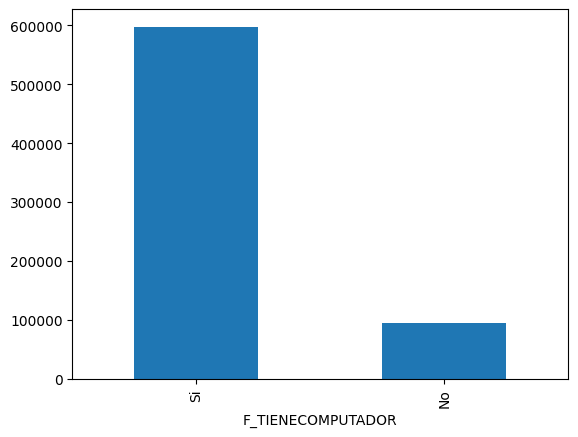

In [140]:
viewValues(traincopy, 'F_TIENECOMPUTADOR')

## F_TIENEINTERNET.1

F_TIENEINTERNET.1
Si      592514
No       73357
null     26629
Name: count, dtype: int64


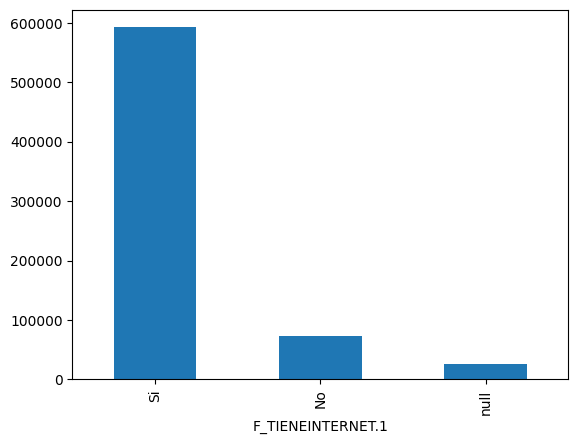

In [141]:
viewValues(train,'F_TIENEINTERNET.1')

F_TIENEINTERNET
Si      592514
No       73357
null     26629
Name: count, dtype: int64


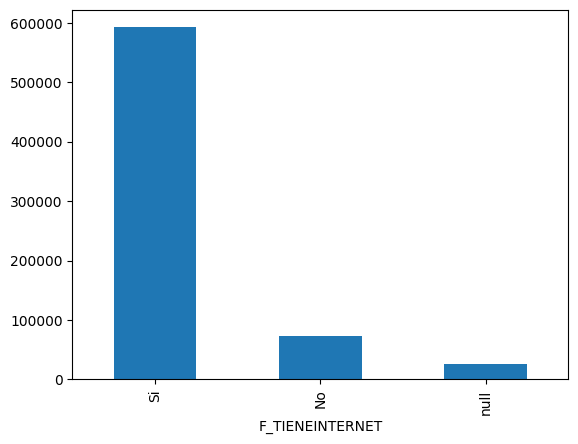

In [142]:
viewValues(train,'F_TIENEINTERNET')

In [143]:
print((train['F_TIENEINTERNET.1'] == train['F_TIENEINTERNET']).mean()*100)

print(train[['F_TIENEINTERNET.1','F_TIENEINTERNET']][train['F_TIENEINTERNET.1'] != train['F_TIENEINTERNET']])

96.15465703971118
       F_TIENEINTERNET.1 F_TIENEINTERNET
21                   NaN             NaN
26                   NaN             NaN
48                   NaN             NaN
49                   NaN             NaN
58                   NaN             NaN
...                  ...             ...
692444               NaN             NaN
692448               NaN             NaN
692454               NaN             NaN
692464               NaN             NaN
692487               NaN             NaN

[26629 rows x 2 columns]


In [144]:
traincopy.drop('F_TIENEINTERNET.1',axis=1,  inplace=True)

## F_EDUCACIONMADRE

F_EDUCACIONMADRE
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado                                46246
Técnica o tecnológica incompleta         27533
null                                     23664
Educación profesional incompleta         22470
Ninguno                                  14483
No sabe                                   3017
No Aplica                                 1918
Name: count, dtype: int64


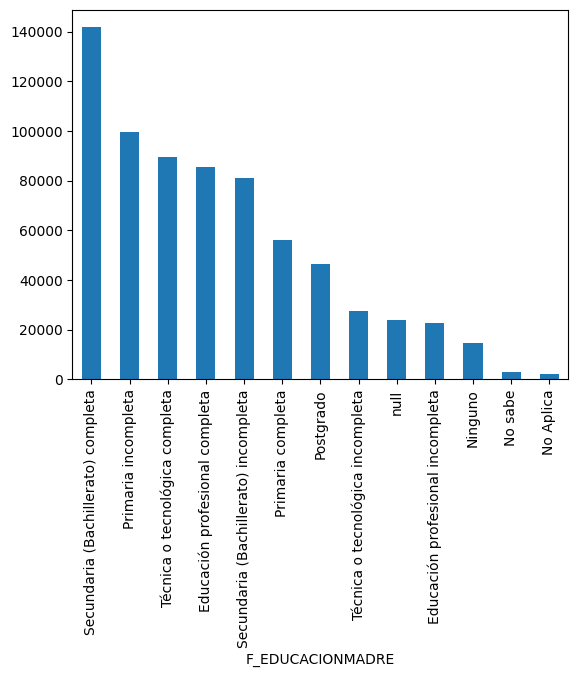

In [145]:
viewValues(train, 'F_EDUCACIONMADRE')

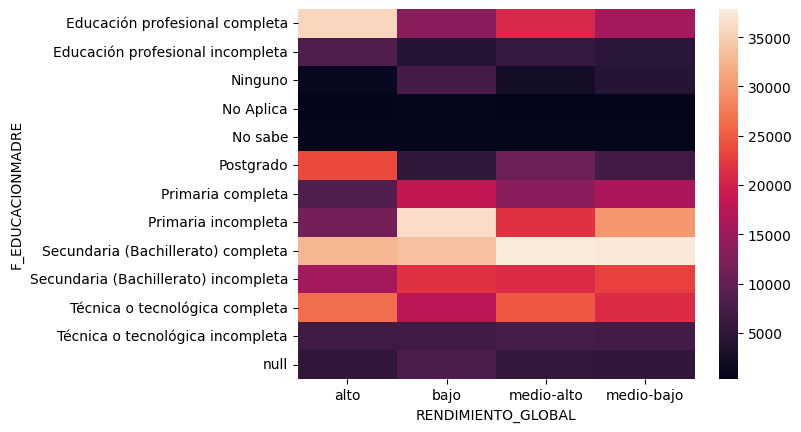

In [146]:
compareDiscreteValues(train, 'F_EDUCACIONMADRE')

In [147]:
columnValues = getDistincValues(traincopy, 'F_EDUCACIONMADRE')
print(columnValues)
replaceNullByList(traincopy, 'F_EDUCACIONMADRE', columnValues)

['Postgrado', 'Técnica o tecnológica incompleta', 'Secundaria (Bachillerato) completa', 'Primaria completa', 'Técnica o tecnológica completa', 'Secundaria (Bachillerato) incompleta', 'Educación profesional incompleta', 'Educación profesional completa', 'Primaria incompleta', 'Ninguno', 'No Aplica', 'No sabe']


/tmp/ipython-input-3805581052.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isna()] = ramdomReplaces
/tmp/ipython-input-3805581052.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

F_EDUCACIONMADRE
Secundaria (Bachillerato) completa      143704
Primaria incompleta                     101321
Técnica o tecnológica completa           91530
Educación profesional completa           87299
Secundaria (Bachillerato) incompleta     82957
Primaria completa                        58120
Postgrado                                48269
Técnica o tecnológica incompleta         29524
Educación profesional incompleta         24480
Ninguno                                  16499
No sabe                                   4932
No Aplica                                 3865
Name: count, dtype: int64


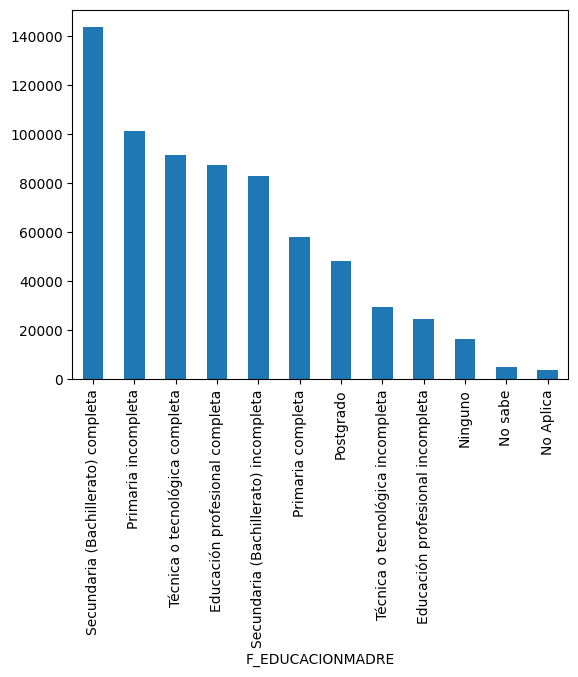

In [148]:
viewValues(traincopy, 'F_EDUCACIONMADRE')

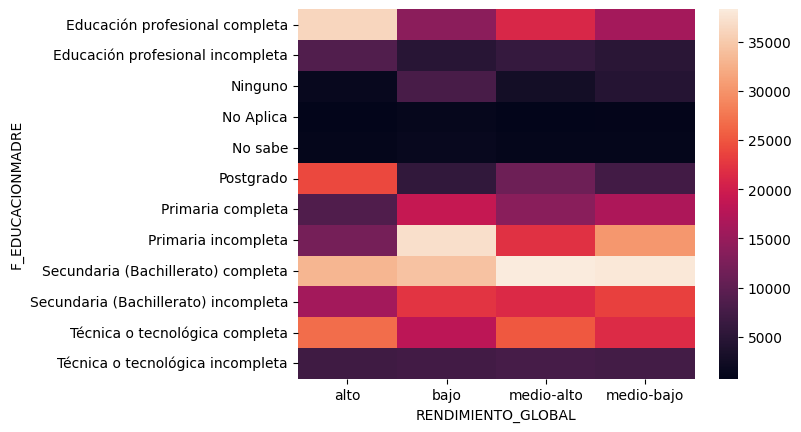

In [149]:
compareDiscreteValues(traincopy,'F_EDUCACIONMADRE')

# Cambiar datos a numericos

In [150]:
train.head(10)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


In [151]:
def onehotEncode(df, column):
    values = df[column].unique().tolist() # obteniendo los valores

    for value in values:
        df[column + '_' + value] = (df[column] == value).astype(int) #haciendo cada columna nueva

    df.drop(columns=[column], inplace=True) #borrando la columna anterior

    return df

def percentagePositives(df, roundVal=4):
  print(df._get_numeric_data().mean().round(roundVal)*100)

In [192]:
def formatText(df, column):

  def removeAccents(text):
    if isinstance(text, str):
        return ''.join(
            c for c in unicodedata.normalize('NFKD', text)
            if not unicodedata.combining(c)
        )
    return text

  df[column] = df[column].apply(removeAccents)

def valuesPercentage(df, column):
  df = df.copy()
  formatText(df, column)
  return ((df[column].value_counts()/len(df))*100) # obtiene la frecuencia relativa de cada valor

def valuesFilterSignificance(df, column, percentage, printInfo = True):
  column = valuesPercentage(df, column)

  if printInfo:
    print(column[column >= percentage])
    print("porcentaje acumulado: ",column[column >= percentage].sum())
    print("numero de valores: ",(column[column >= percentage]).shape[0])

  return column[column >= percentage]

def groupValuesByPercentage(df, column, percentage, valueGroup):
  formatText(df, column)
  valuesfiltered = valuesFilterSignificance(df, column, percentage, printInfo = False)
  valuesfiltered = valuesfiltered.index.tolist()  #obteniendo los valores que no se agruparan

  df[column].loc[~df[column].isin(valuesfiltered)] = valueGroup # agrupando los demas valores y asignandoles el valor de valueGroup

def groupValuesByList(df, column, valuesToGroup, valueGroup):
  df[column].loc[df[column].isin(valuesToGroup)] = valueGroup # agrupando los demas valores


def printUniqueValues(df, column, format = False):
  if format:
    formatText(df, column)
  values = df[column].unique()
  print(values)
  print("Numero de valores: ",values.shape[0])


In [191]:
def replaceBinaryValues(oneValue, zeroValue, df, column):
  valuesReplace = {oneValue: 1, zeroValue: 0}
  df[column].replace(valuesReplace, inplace=True)

def replaceDiscreteValues(replaceDict, df, column):
  df[column].replace(replaceDict, inplace=True)


## E_PRGM_ACADEMICO

In [154]:
printUniqueValues(train, 'E_PRGM_ACADEMICO', format=True)

['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACION EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACION FINANCIERA' 'HOTELERIA Y TURISMO'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTION DE LA SEGURIDAD Y LA SALUD LABORAL'
 'MAESTRO EN MUSICA' 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL'
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL' 'INGENIERIA CIVIL'
 'CONTADURIA PUBLICA' 'ADMINISTRACION EN SALUD' 'ESTADISTICA'
 'LICENCIATURA EN BIOLOGIA' 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA'
 'COMUNICACION AUDIOVISUAL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES'
 'COMUNICACION SOCIAL  - PERIODISMO' 'SEGURIDAD Y SALUD EN EL TRABAJO'
 'MEDICINA' 'ADMINISTRACION DE LA SEGURIDAD SOCIAL' 'ODONTOLOGIA'
 'DISENO INDUSTRIAL' 'ECONOMIA' 'INGENIERIA DE PROCESOS INDUSTRIALES'
 'INGE

In [155]:
pd.set_option('display.max_rows', 500)
valuesfiltered = valuesFilterSignificance(train, 'E_PRGM_ACADEMICO', 0.5)

E_PRGM_ACADEMICO
ADMINISTRACION DE EMPRESAS                    11.072780
DERECHO                                        7.688664
CONTADURIA PUBLICA                             7.486787
PSICOLOGIA                                     7.120433
INGENIERIA INDUSTRIAL                          5.024404
INGENIERIA CIVIL                               3.024260
MEDICINA                                       2.613574
INGENIERIA DE SISTEMAS                         2.603321
LICENCIATURA EN PEDAGOGIA INFANTIL             2.133285
INGENIERIA AMBIENTAL                           1.875812
TRABAJO SOCIAL                                 1.831913
ENFERMERIA                                     1.759711
ARQUITECTURA                                   1.656173
ADMINISTRACION EN SALUD OCUPACIONAL            1.591047
NEGOCIOS INTERNACIONALES                       1.279134
ECONOMIA                                       1.085199
INGENIERIA MECANICA                            1.049964
INGENIERIA ELECTRONICA         

/tmp/ipython-input-1462876183.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[~df[column].isin(valuesfiltered)] = valueGroup # agrupando los demas valores y asignandoles el valor de valueGroup
/tmp/ipython-input-146287618

E_PRGM_ACADEMICO
OTROS                                         218498
ADMINISTRACION DE EMPRESAS                     76679
DERECHO                                        53244
CONTADURIA PUBLICA                             51846
PSICOLOGIA                                     49309
INGENIERIA INDUSTRIAL                          34794
INGENIERIA CIVIL                               20943
MEDICINA                                       18099
INGENIERIA DE SISTEMAS                         18028
LICENCIATURA EN PEDAGOGIA INFANTIL             14773
INGENIERIA AMBIENTAL                           12990
TRABAJO SOCIAL                                 12686
ENFERMERIA                                     12186
ARQUITECTURA                                   11469
ADMINISTRACION EN SALUD OCUPACIONAL            11018
NEGOCIOS INTERNACIONALES                        8858
ECONOMIA                                        7515
INGENIERIA MECANICA                             7271
INGENIERIA ELECTRONICA       

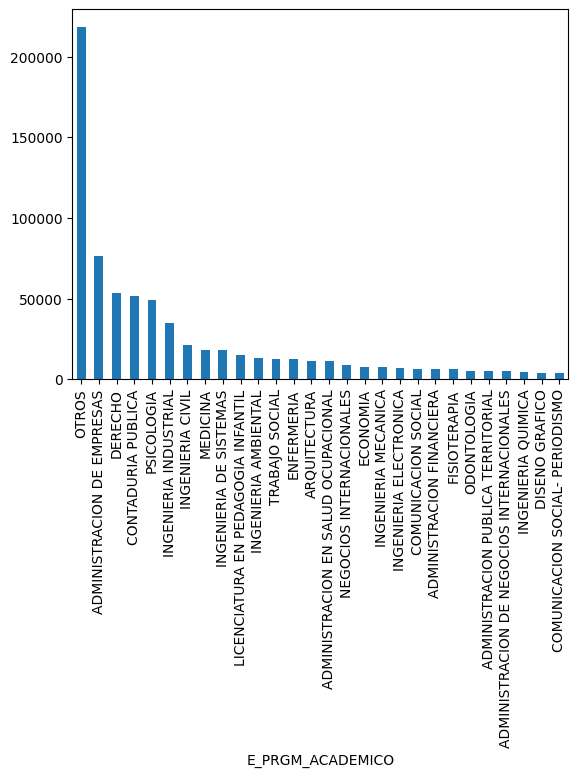

In [156]:
copy2train = traincopy.copy()
groupValuesByPercentage(copy2train, 'E_PRGM_ACADEMICO', 0.5, 'OTROS')

viewValues(copy2train, 'E_PRGM_ACADEMICO')


In [157]:
copy2train = onehotEncode(copy2train, 'E_PRGM_ACADEMICO')
percentagePositives(copy2train)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO                                              7.69
E_PRGM_ACADEMICO_OTROS                                               31.55
E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS                          11.07
E_PRGM_ACADEMICO_PSICOLOGIA                                           7.12
E_PRGM_ACADEMICO_INGENIERIA MECANICA                                  1.05
E_PRGM_ACADEMICO_ADMINISTRACION EN SALUD OCUPACIONAL                  1.59
E_PRGM_ACADEMICO_INGENIER

## E_PRGM_DEPARTAMENTO

In [158]:
print(getDistincValues(train, 'E_PRGM_DEPARTAMENTO'))
valuesPercentage(train, 'E_PRGM_DEPARTAMENTO')

['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'SUCRE', 'CAQUETA', 'CUNDINAMARCA', 'BOLIVAR', 'TOLIMA', 'VALLE', 'QUINDIO', 'RISARALDA', 'CORDOBA', 'META', 'LA GUAJIRA', 'BOYACA', 'NARIÑO', 'CAUCA', 'NORTE SANTANDER', 'CESAR', 'PUTUMAYO', 'CALDAS', 'MAGDALENA', 'CHOCO', 'CASANARE', 'ARAUCA', 'GUAVIARE', 'AMAZONAS', 'VAUPES', 'SAN ANDRES']


,count
E_PRGM_DEPARTAMENTO,
BOGOTA,40.744982
ANTIOQUIA,12.073213
VALLE,6.438700
ATLANTICO,5.923466
SANTANDER,4.162888
NORTE SANTANDER,3.261805
BOLIVAR,2.978917
BOYACA,2.028592
CUNDINAMARCA,2.024260


In [159]:
copy2train = onehotEncode(copy2train, 'E_PRGM_DEPARTAMENTO')

In [160]:
percentagePositives(copy2train)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO                                              7.69
E_PRGM_ACADEMICO_OTROS                                               31.55
E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS                          11.07
E_PRGM_ACADEMICO_PSICOLOGIA                                           7.12
E_PRGM_ACADEMICO_INGENIERIA MECANICA                                  1.05
E_PRGM_ACADEMICO_ADMINISTRACION EN SALUD OCUPACIONAL                  1.59
E_PRGM_ACADEMICO_INGENIER

## F_TIENEINTERNET

F_TIENEINTERNET
Si    592514
No     99986
Name: count, dtype: int64


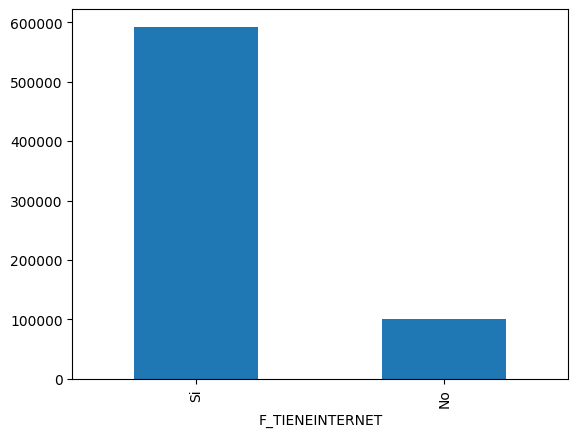

In [161]:
viewValues(traincopy, 'F_TIENEINTERNET')

In [162]:
replaceBinaryValues("Si", "No", copy2train, 'F_TIENEINTERNET')

/tmp/ipython-input-3395557631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(valuesReplace, inplace=True)
/tmp/ipython-input-3395557631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(valuesReplace, inplace=True)


F_TIENEINTERNET
1    592514
0     99986
Name: count, dtype: int64


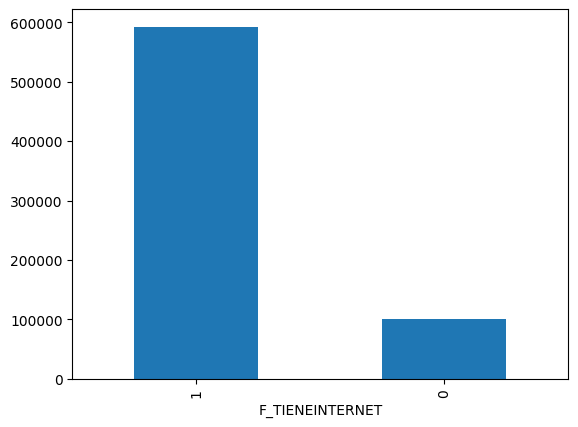

In [163]:
viewValues(copy2train, 'F_TIENEINTERNET')


## F_EDUCACIONPADRE

F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      130237
Primaria incompleta                     127572
Educación profesional completa           85084
Secundaria (Bachillerato) incompleta     73643
Técnica o tecnológica completa           64970
Primaria completa                        57785
Postgrado                                46141
Educación profesional incompleta         29002
Técnica o tecnológica incompleta         24499
Ninguno                                  23871
No sabe                                  18496
No Aplica                                11200
Name: count, dtype: int64


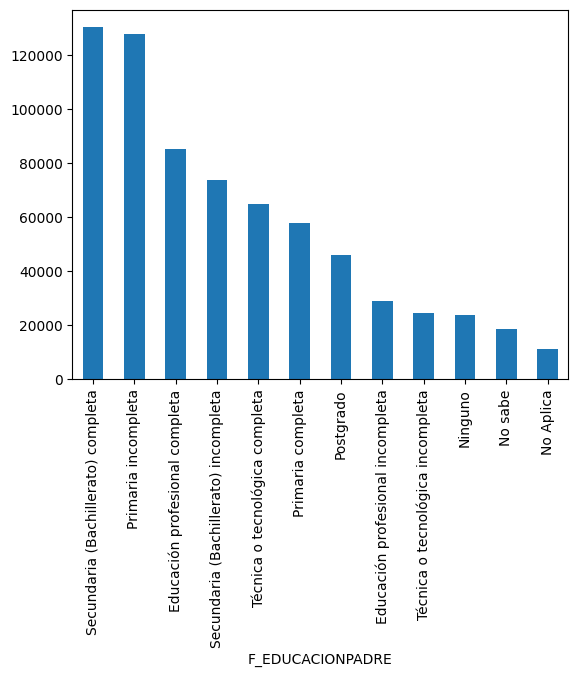

In [164]:
viewValues(traincopy, 'F_EDUCACIONPADRE')

In [165]:
copy2train = groupValuesByList(copy2train, 'F_EDUCACIONPADRE', ['Ninguno', 'No sabe','No Aplica'], 'NINGUNO')

/tmp/ipython-input-1462876183.py:36: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isin(valuesToGroup)] = valueGroup # agrupando los demas valores
/tmp/ipython-input-1462876183.py:36: SettingWithCopyWarning: 
A valu

F_EDUCACIONPADRE
Secundaria (Bachillerato) completa      130237
Primaria incompleta                     127572
Educación profesional completa           85084
Secundaria (Bachillerato) incompleta     73643
Técnica o tecnológica completa           64970
Primaria completa                        57785
Postgrado                                46141
Educación profesional incompleta         29002
Técnica o tecnológica incompleta         24499
Ninguno                                  23871
No sabe                                  18496
No Aplica                                11200
Name: count, dtype: int64


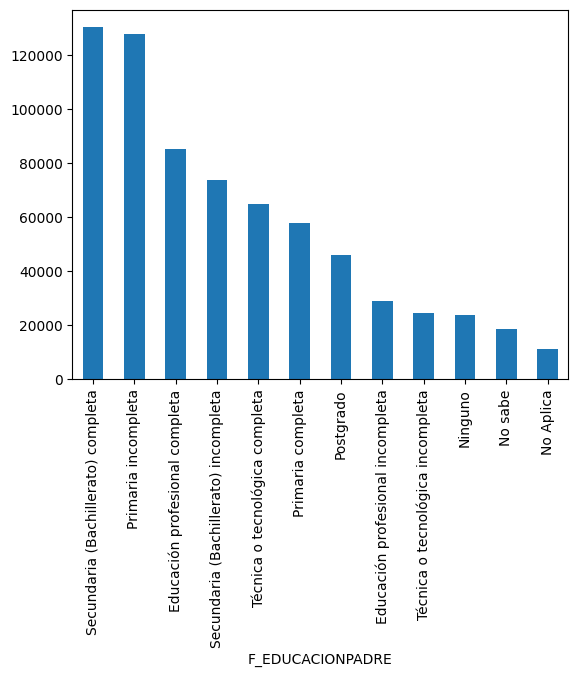

In [166]:
viewValues(copy2train, 'F_EDUCACIONPADRE')

In [167]:
copy2train = onehotEncode(copy2train, 'F_EDUCACIONPADRE')

In [168]:
percentagePositives(copy2train)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
F_TIENEINTERNET                                                      85.56
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO                                              7.69
E_PRGM_ACADEMICO_OTROS                                               31.55
E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS                          11.07
E_PRGM_ACADEMICO_PSICOLOGIA                                           7.12
E_PRGM_ACADEMICO_INGENIERIA MECANICA                                  1.05
E_PRGM_ACADEMICO_ADMINIST

## F_TIENELAVADORA

F_TIENELAVADORA
Si    563390
No    129110
Name: count, dtype: int64


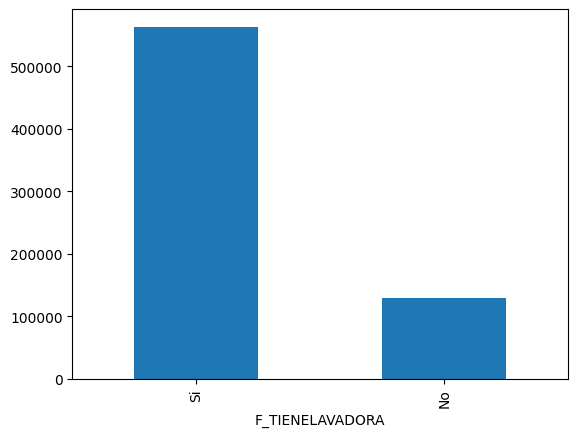

In [169]:
viewValues(copy2train, 'F_TIENELAVADORA')

In [170]:
replaceBinaryValues("Si", "No", copy2train, 'F_TIENELAVADORA')


/tmp/ipython-input-3395557631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(valuesReplace, inplace=True)
/tmp/ipython-input-3395557631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(valuesReplace, inplace=True)


F_TIENELAVADORA
1    563390
0    129110
Name: count, dtype: int64


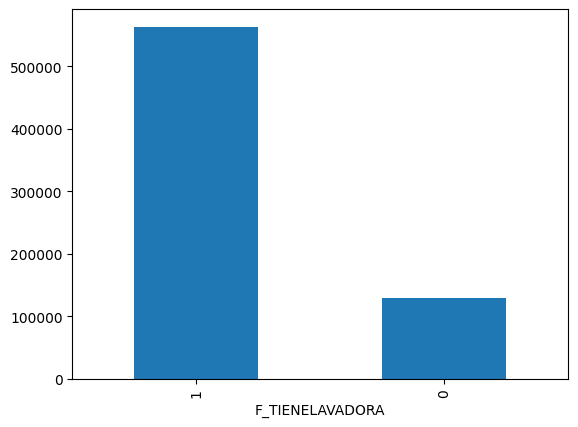

In [171]:
viewValues(copy2train, 'F_TIENELAVADORA')

## F_TIENEAUTOMOVIL

F_TIENEAUTOMOVIL
No    434373
Si    258127
Name: count, dtype: int64


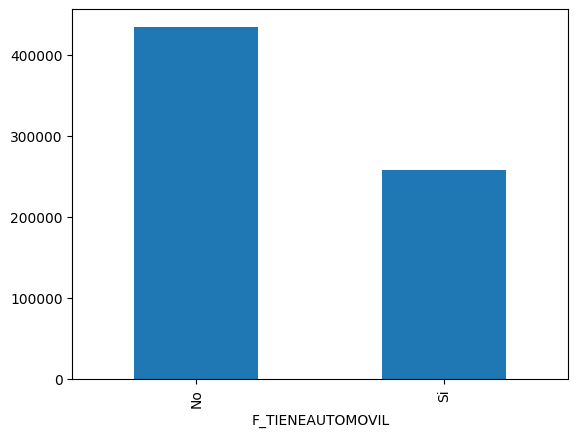

In [172]:
viewValues(copy2train, 'F_TIENEAUTOMOVIL')

In [173]:
replaceBinaryValues("Si", "No", copy2train, 'F_TIENEAUTOMOVIL')

/tmp/ipython-input-3395557631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(valuesReplace, inplace=True)
/tmp/ipython-input-3395557631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(valuesReplace, inplace=True)


F_TIENEAUTOMOVIL
0    434373
1    258127
Name: count, dtype: int64


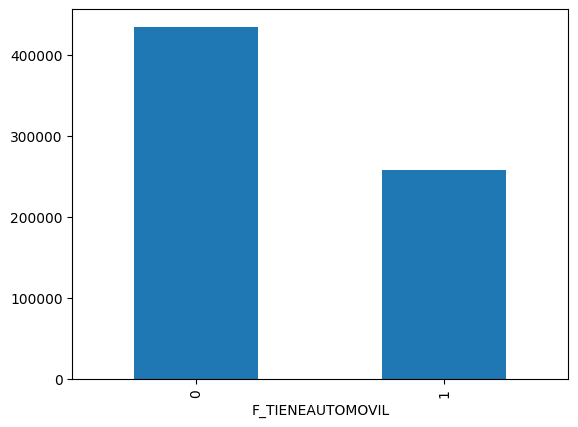

In [174]:
viewValues(copy2train, 'F_TIENEAUTOMOVIL')

## E_PRIVADO_LIBERTAD

E_PRIVADO_LIBERTAD
N    692466
S        34
Name: count, dtype: int64


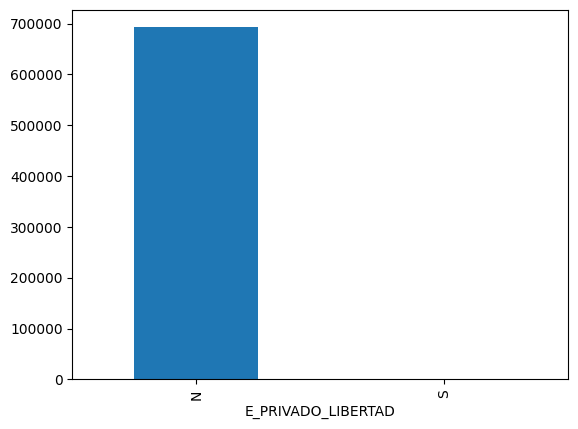

In [175]:
viewValues(traincopy, 'E_PRIVADO_LIBERTAD')

In [176]:
replaceBinaryValues("S", "N", copy2train, 'E_PRIVADO_LIBERTAD')

/tmp/ipython-input-3395557631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(valuesReplace, inplace=True)
/tmp/ipython-input-3395557631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(valuesReplace, inplace=True)


E_PRIVADO_LIBERTAD
0    692466
1        34
Name: count, dtype: int64


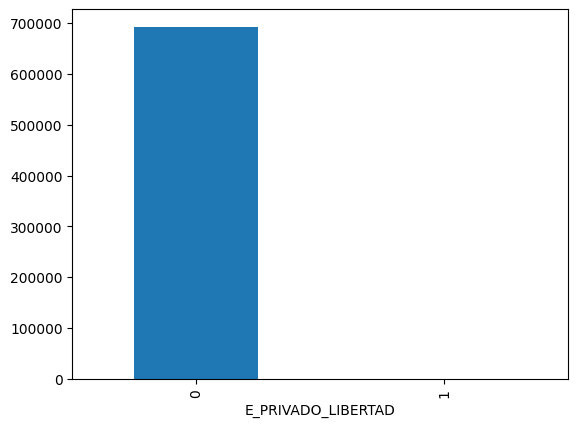

In [177]:
viewValues(copy2train, 'E_PRIVADO_LIBERTAD')

## E_PAGOMATRICULAPROPIO

E_PAGOMATRICULAPROPIO
No    388699
Si    303801
Name: count, dtype: int64


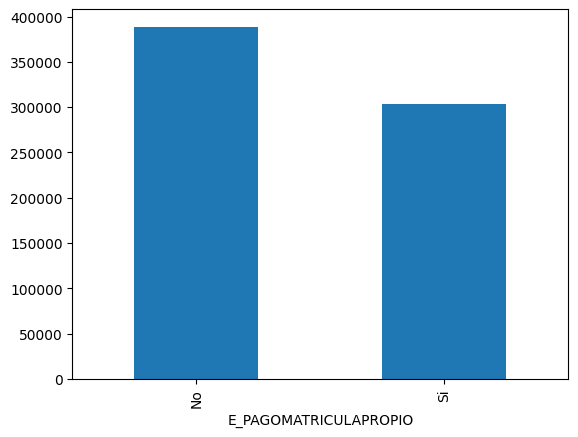

In [178]:
viewValues(traincopy, 'E_PAGOMATRICULAPROPIO')

In [179]:
replaceBinaryValues("Si", "No", copy2train, 'E_PAGOMATRICULAPROPIO')

/tmp/ipython-input-3395557631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(valuesReplace, inplace=True)
/tmp/ipython-input-3395557631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(valuesReplace, inplace=True)


E_PAGOMATRICULAPROPIO
0    388699
1    303801
Name: count, dtype: int64


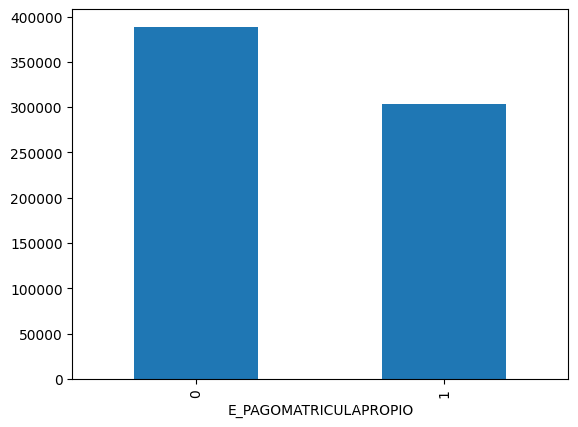

In [180]:
viewValues(copy2train, 'E_PAGOMATRICULAPROPIO')

## F_TIENECOMPUTADOR

F_TIENECOMPUTADOR
Si    597670
No     94830
Name: count, dtype: int64


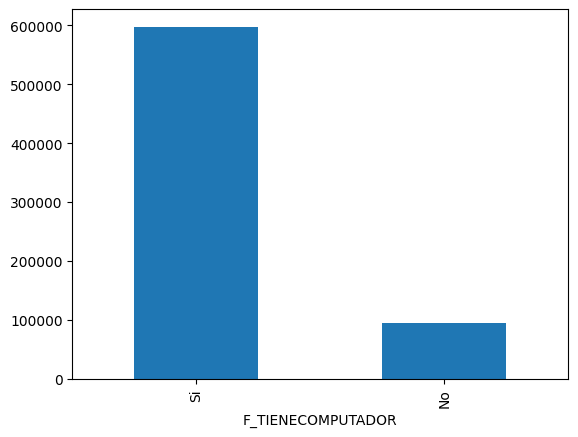

In [181]:
viewValues(copy2train, 'F_TIENECOMPUTADOR')

In [182]:
replaceBinaryValues("Si", "No", copy2train, 'F_TIENECOMPUTADOR')

/tmp/ipython-input-3395557631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(valuesReplace, inplace=True)
/tmp/ipython-input-3395557631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(valuesReplace, inplace=True)


F_TIENECOMPUTADOR
1    597670
0     94830
Name: count, dtype: int64


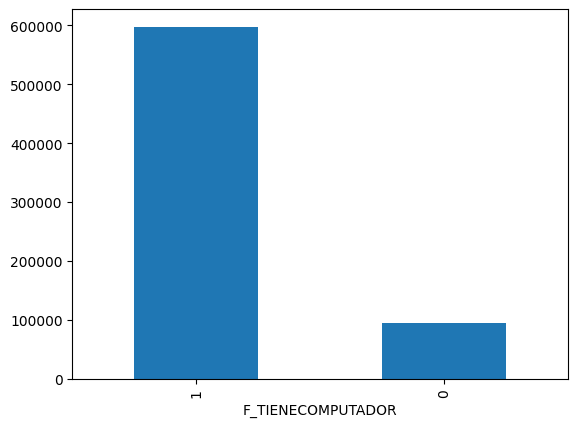

In [183]:
viewValues(copy2train, 'F_TIENECOMPUTADOR')

## F_EDUCACIONMADRE

In [184]:
valuesPercentage(traincopy, 'F_EDUCACIONMADRE')

,count
F_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,20.751480
Primaria incompleta,14.631191
Tecnica o tecnologica completa,13.217329
Educacion profesional completa,12.606354
Secundaria (Bachillerato) incompleta,11.979350
Primaria completa,8.392780
Postgrado,6.970253
Tecnica o tecnologica incompleta,4.263394
Educacion profesional incompleta,3.535018


In [185]:
groupValuesByList(copy2train, 'F_EDUCACIONMADRE', ['Ninguno', 'No sabe','No Aplica'], 'NINGUNO')

/tmp/ipython-input-1462876183.py:36: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column].loc[df[column].isin(valuesToGroup)] = valueGroup # agrupando los demas valores
/tmp/ipython-input-1462876183.py:36: SettingWithCopyWarning: 
A valu

F_EDUCACIONMADRE
Secundaria (Bachillerato) completa      143704
Primaria incompleta                     101321
Técnica o tecnológica completa           91530
Educación profesional completa           87299
Secundaria (Bachillerato) incompleta     82957
Primaria completa                        58120
Postgrado                                48269
Técnica o tecnológica incompleta         29524
NINGUNO                                  25296
Educación profesional incompleta         24480
Name: count, dtype: int64


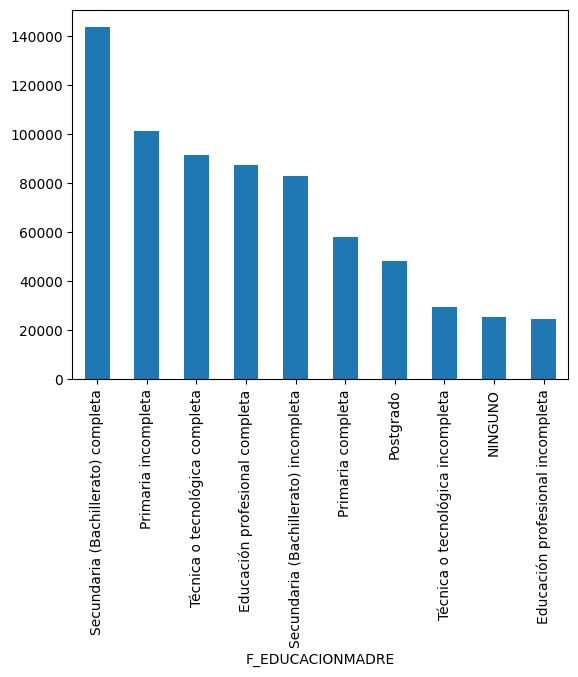

In [186]:
viewValues(copy2train, 'F_EDUCACIONMADRE')


In [187]:
onehotEncode(copy2train, 'F_EDUCACIONMADRE')

,ID,PERIODO_ACADEMICO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,F_EDUCACIONMADRE_Postgrado,F_EDUCACIONMADRE_Técnica o tecnológica incompleta,F_EDUCACIONMADRE_Secundaria (Bachillerato) completa,F_EDUCACIONMADRE_Primaria completa,F_EDUCACIONMADRE_Técnica o tecnológica completa,F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE_Educación profesional incompleta,F_EDUCACIONMADRE_Educación profesional completa,F_EDUCACIONMADRE_Primaria incompleta,F_EDUCACIONMADRE_NINGUNO
0,904256,20212,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,645256,20212,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,308367,20203,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,470353,20195,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,989032,20212,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
692496,754213,20212,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
692497,504185,20183,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
692498,986620,20195,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [188]:
percentagePositives(copy2train)

ID                                                             49460613.06
PERIODO_ACADEMICO                                               2019836.67
F_TIENEINTERNET                                                      85.56
F_TIENELAVADORA                                                      81.36
F_TIENEAUTOMOVIL                                                     37.27
E_PRIVADO_LIBERTAD                                                    0.00
E_PAGOMATRICULAPROPIO                                                43.87
F_TIENECOMPUTADOR                                                    86.31
INDICADOR_1                                                          26.86
INDICADOR_2                                                          26.00
INDICADOR_3                                                          26.21
INDICADOR_4                                                          26.29
E_PRGM_ACADEMICO_ENFERMERIA                                           1.76
E_PRGM_ACADEMICO_DERECHO 

## E_VALORMATRICULAUNIVERSIDAD

In [190]:
getDistincValues(traincopy, 'E_VALORMATRICULAUNIVERSIDAD')

['Entre 5.5 millones y menos de 7 millones',
 'Entre 2.5 millones y menos de 4 millones',
 'Entre 4 millones y menos de 5.5 millones',
 'Más de 7 millones',
 'Entre 1 millón y menos de 2.5 millones',
 'Entre 500 mil y menos de 1 millón',
 'Menos de 500 mil',
 'No pagó matrícula']

In [193]:
valuesDict = {
    'No pagó matrícula': 0,
    'Menos de 500 mil': 1,
    'Entre 500 mil y menos de 1 millón': 2,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Más de 7 millones': 7
}

replaceDiscreteValues(valuesDict, copy2train, 'E_VALORMATRICULAUNIVERSIDAD')

/tmp/ipython-input-294354430.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(replaceDict, inplace=True)
/tmp/ipython-input-294354430.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(replaceDict, inplace=True)


E_VALORMATRICULAUNIVERSIDAD
3    204048
4    127430
1     80263
2     78704
5     69736
7     68014
6     38490
0     25815
Name: count, dtype: int64


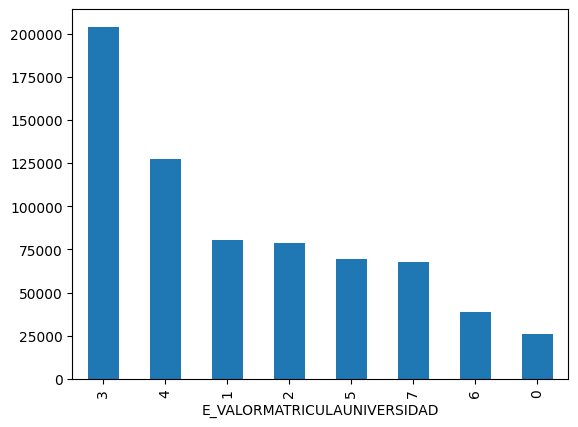

In [194]:
viewValues(copy2train, 'E_VALORMATRICULAUNIVERSIDAD')

## E_HORASSEMANATRABAJA

E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      147407
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


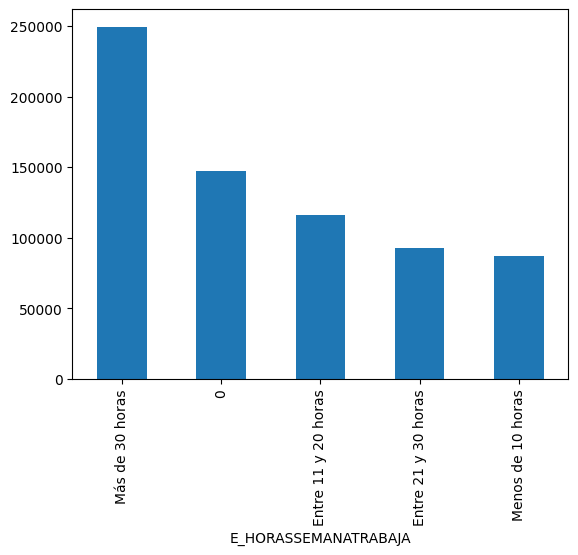

In [195]:
viewValues(copy2train, 'E_HORASSEMANATRABAJA')

In [197]:
dictValues={
  '0':0,
  'Menos de 10 horas':1,
  'Entre 11 y 20 horas':2,
  'Entre 21 y 30 horas':3,
  'Más de 30 horas':4
}

replaceDiscreteValues(dictValues, copy2train, 'E_HORASSEMANATRABAJA')

/tmp/ipython-input-294354430.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(replaceDict, inplace=True)
/tmp/ipython-input-294354430.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(replaceDict, inplace=True)


E_HORASSEMANATRABAJA
4    249352
0    147407
2    115857
3     92693
1     87191
Name: count, dtype: int64


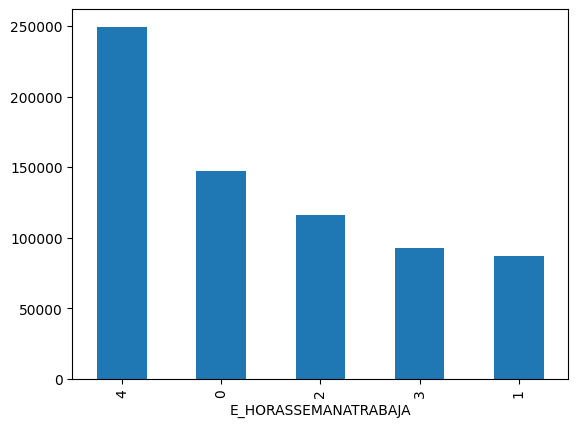

In [198]:
viewValues(copy2train, 'E_HORASSEMANATRABAJA')

## F_ESTRATOVIVIENDA

F_ESTRATOVIVIENDA
Estrato 2      237282
Estrato 3      215199
Estrato 1      116621
Estrato 4       70192
Estrato 5       28168
Estrato 6       17225
Sin Estrato      7813
Name: count, dtype: int64


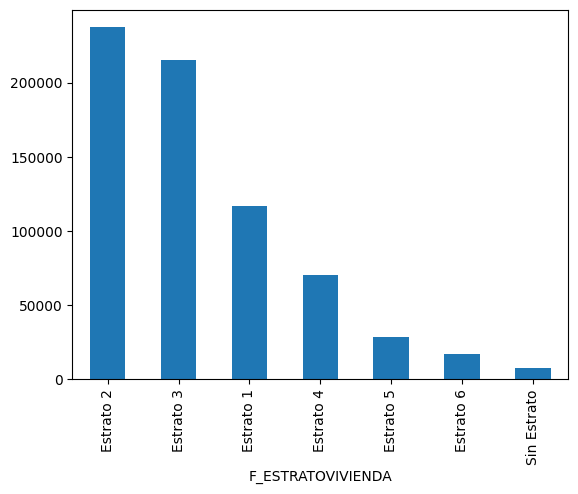

In [199]:
viewValues(copy2train, 'F_ESTRATOVIVIENDA')

In [201]:
dictValues = {
    'Sin Estrato': 0,
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

replaceDiscreteValues(dictValues, copy2train, 'F_ESTRATOVIVIENDA')

/tmp/ipython-input-294354430.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(replaceDict, inplace=True)
/tmp/ipython-input-294354430.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(replaceDict, inplace=True)


F_ESTRATOVIVIENDA
2    237282
3    215199
1    116621
4     70192
5     28168
6     17225
0      7813
Name: count, dtype: int64


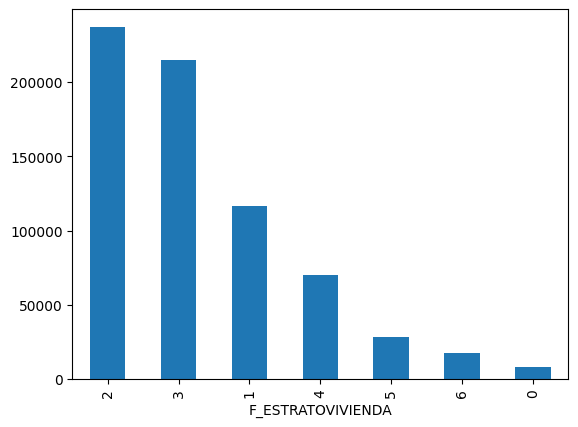

In [202]:
viewValues(copy2train, 'F_ESTRATOVIVIENDA')

## PERIODO_ACADEMICO

PERIODO_ACADEMICO
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: count, dtype: int64


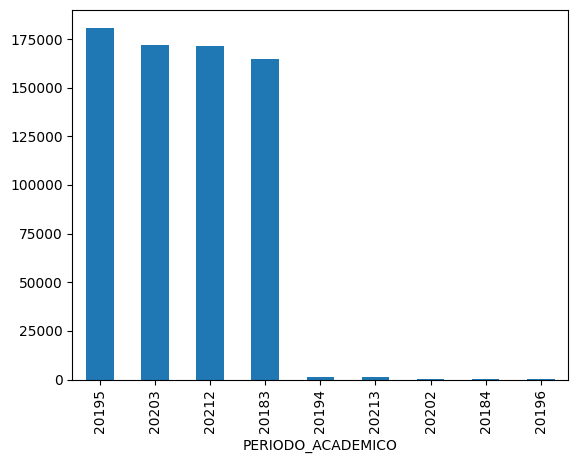

In [207]:
viewValues(copy2train, 'PERIODO_ACADEMICO')

## RENDIMIENTO_GLOBAL

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


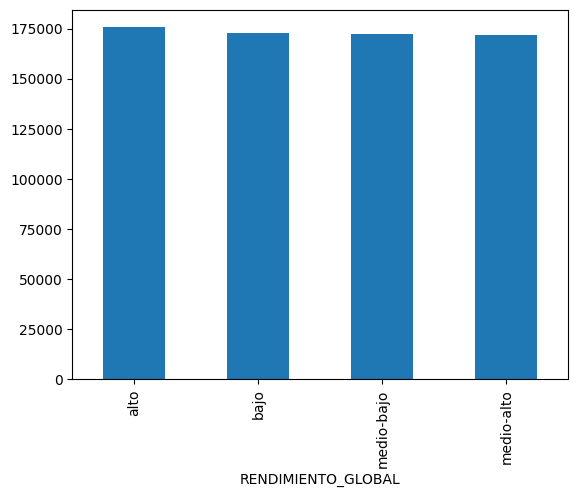

In [203]:
viewValues(copy2train ,'RENDIMIENTO_GLOBAL')

In [205]:
dictValues = {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4
}

replaceDiscreteValues(dictValues, copy2train, 'RENDIMIENTO_GLOBAL')

/tmp/ipython-input-294354430.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(replaceDict, inplace=True)
/tmp/ipython-input-294354430.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].replace(replaceDict, inplace=True)


RENDIMIENTO_GLOBAL
4    175619
1    172987
2    172275
3    171619
Name: count, dtype: int64


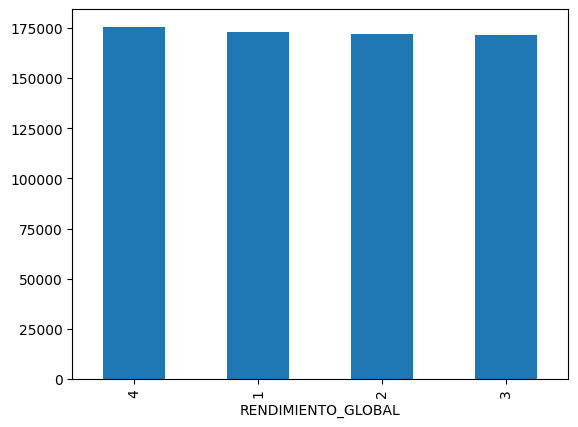

In [206]:
viewValues(copy2train, 'RENDIMIENTO_GLOBAL')